<ipython-input-13-c2723cb25b92>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined[column].fillna(combined[column].median(), inplace=True)


Mean Squared Error: 4273559010.2481303
R² Score: 0.4428452069947444


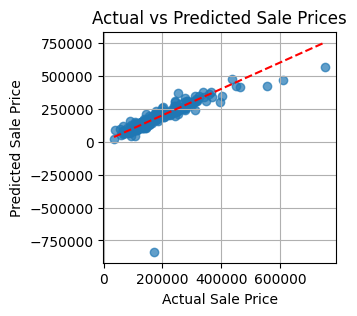

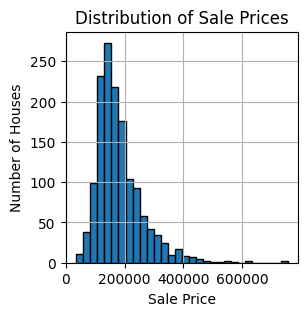

In [13]:
import pandas as pd

# Load the training data
train_df = pd.read_csv('/content/train.csv')

# Load the test data
test_df = pd.read_csv('/content/test.csv')
# Combine train and test data for preprocessing
combined = pd.concat([train_df, test_df], sort=False)

# Fill missing values with median for numerical columns
for column in combined.select_dtypes(include=['float64', 'int64']).columns:
    combined[column].fillna(combined[column].median(), inplace=True)

# One-hot encode categorical variables
combined = pd.get_dummies(combined)

# Split the combined data back into train and test sets
train_processed = combined[:len(train_df)]
test_processed = combined[len(train_df):]

# Separate features and target variable from training data
X = train_processed.drop('SalePrice', axis=1)
y = train_df['SalePrice']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted Prices
plt.figure(figsize=(3, 3))
plt.scatter(y_val, y_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.grid(True)
plt.show()

# Histogram: Distribution of Sale Prices
plt.figure(figsize=(3, 3))
plt.hist(y, bins=30, edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Sale Prices')
plt.grid(True)
plt.show()

